In [102]:
import pandas as pd
import os
import numpy as np

In [103]:
cust=pd.read_csv('Customers.csv')
prd=pd.read_csv('Products.csv')
trns=pd.read_csv('Transactions.csv')

In [104]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [105]:
merged_data = trns.merge(cust, on='CustomerID').merge(prd, on='ProductID')

In [106]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB


In [107]:
df_cleaned = merged_data.drop(columns=['TransactionID','ProductID','Price_y','CustomerName'])

In [108]:
from sklearn.preprocessing import LabelEncoder

for col in ['Region', 'ProductName', 'Category']:
    df_cleaned[col] = LabelEncoder().fit_transform(df_cleaned[col])


In [109]:
df_cleaned['TransactionDate'] = pd.to_datetime(df_cleaned['TransactionDate'])
reference_date = df_cleaned['TransactionDate'].max()


In [110]:
rfm_data = df_cleaned.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (reference_date - x.max()).days,  
    'CustomerID': 'count',  
    'TotalValue': 'sum'  
}).rename(columns={
    'TransactionDate': 'Recency',
    'CustomerID': 'Frequency',
    'TotalValue': 'Monetary'
})

print(rfm_data.head())


            Recency  Frequency  Monetary
CustomerID                              
C0001            55          5   3354.52
C0002            25          4   1862.74
C0003           125          4   2725.38
C0004             4          8   5354.88
C0005            54          3   2034.24


## K-Means Clustering

In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(rfm_data)

C:\Users\kisho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kisho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kisho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kisho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

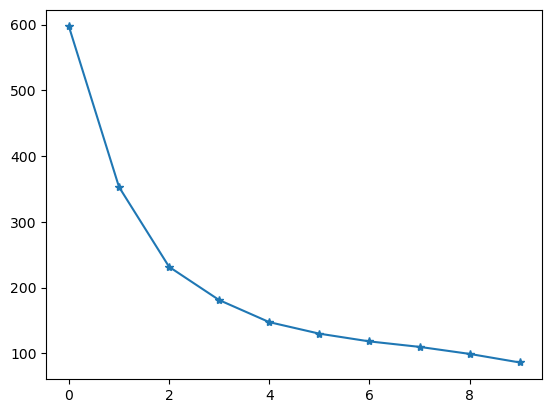

In [112]:
from sklearn.cluster import KMeans

inertia = []
for i in np.arange(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)

plt.plot(inertia,marker = '*')

In [113]:
Clusters = KMeans(n_clusters = 2 , max_iter = 200 , random_state = 42)
Clusters.fit(scaled)
Clusters.labels_

C:\Users\kisho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0])

In [115]:
dbi_score = davies_bouldin_score(scaled, Clusters.labels_)
print(f"Davies-Bouldin Index (DBI) Score: {dbi_score}")


Davies-Bouldin Index (DBI) Score: 1.0453441431107011


C:\Users\kisho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kisho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kisho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kisho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

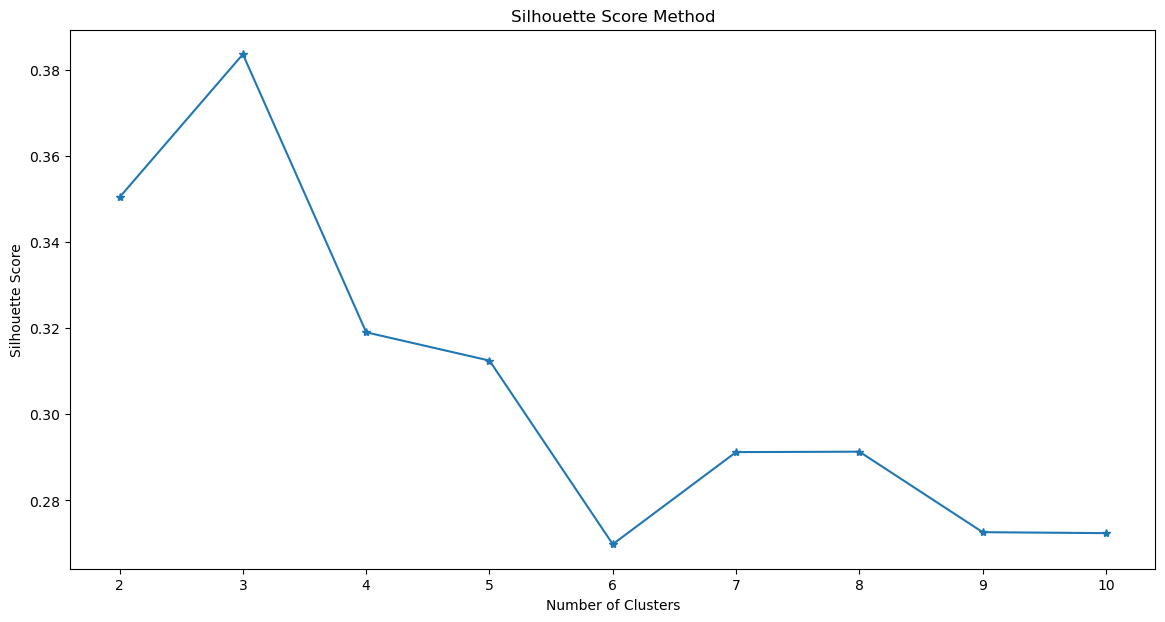

In [117]:
from sklearn.metrics import silhouette_score
silhouette_scores = [ ]
for k in range(2 ,11) :
    kmeans = KMeans(n_clusters = k , random_state = 42 )
    labels = kmeans.fit_predict(scaled)
    silhouette_avg = silhouette_score(scaled , labels , metric = 'euclidean')
    silhouette_scores.append(silhouette_avg)
plt.figure(figsize = (14 ,7))
plt.plot(range(2 , 11), silhouette_scores, marker = '*' )
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show( )

## Agglomerative Clustering

In [128]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

linkage_methods = ['ward', 'complete', 'average']
silhouette_results = {}
for linkage in linkage_methods:
    silhouette_scores = []
    
    for k in range(2, 11):  
        model = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        labels = model.fit_predict(scaled)
        silhouette_avg = silhouette_score(scaled, labels, metric='euclidean')
        silhouette_scores.append(silhouette_avg)
    silhouette_results[linkage] = silhouette_scores

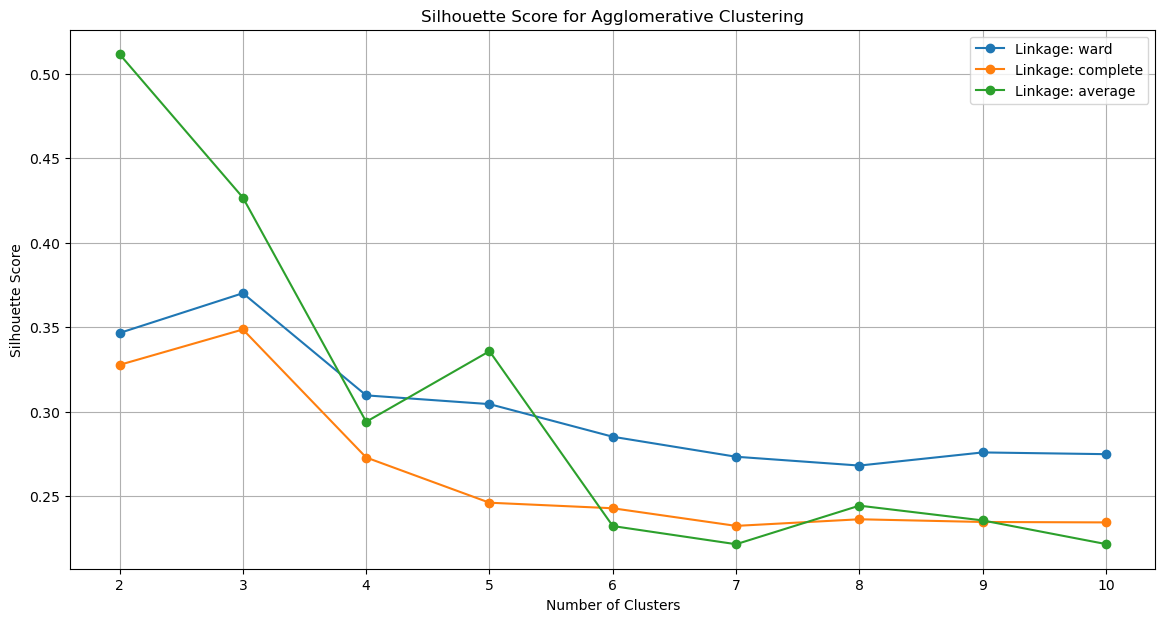

In [129]:
plt.figure(figsize=(14, 7))
for linkage, scores in silhouette_results.items():
    plt.plot(range(2, 11), scores, marker='o', linestyle='-', label=f'Linkage: {linkage}')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Agglomerative Clustering')
plt.legend()
plt.grid(True)
plt.show()

In [93]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
X = rfm_data[['Recency', 'Frequency', 'Monetary']]  

linkage_criteria = ['ward', 'complete', 'average']

n_clusters_list = [2, 3, 4, 5, 6, 7, 8, 9, 10]

db_scores = {}

for linkage in linkage_criteria:
    for n_clusters in n_clusters_list:
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)    
        model.fit(X)  
        dbi = davies_bouldin_score(X, model.labels_)  
        db_scores[(linkage, n_clusters)] = dbi

best_configuration = min(db_scores, key=db_scores.get)
best_dbi = db_scores[best_configuration]

print(f"Best configuration: Linkage: {best_configuration[0]}, Number of Clusters: {best_configuration[1]}")
print(f"Best Davies-Bouldin Index: {best_dbi}")

Best configuration: Linkage: average, Number of Clusters: 2
Best Davies-Bouldin Index: 0.19988051032446713


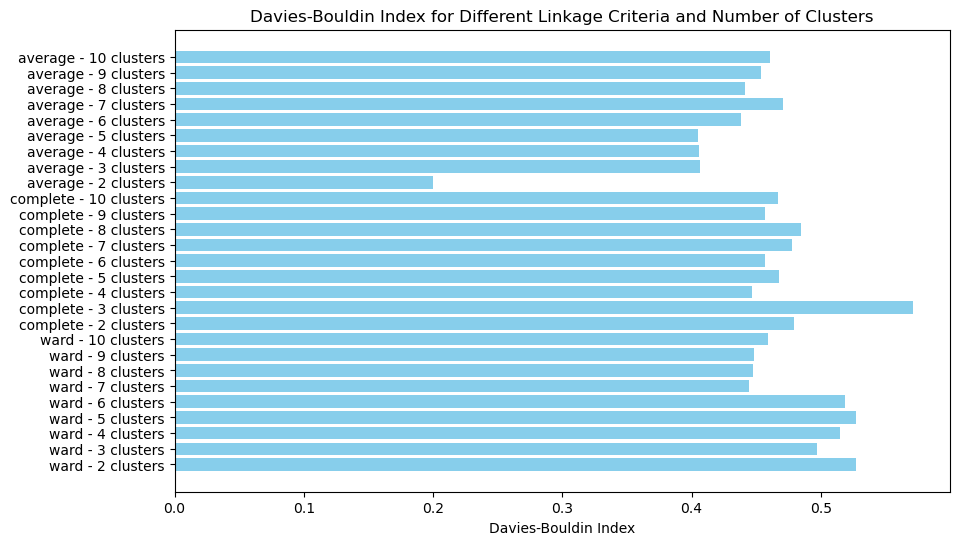

In [119]:
dbi_values = [db_scores[key] for key in db_scores]
configurations = [f"{key[0]} - {key[1]} clusters" for key in db_scores]

plt.figure(figsize=(10, 6))
plt.barh(configurations, dbi_values, color='skyblue')
plt.xlabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Different Linkage Criteria and Number of Clusters')
plt.show()


In [121]:
agg_clust = AgglomerativeClustering(n_clusters=2, linkage='average')

In [122]:
rfm_data['Clusters_ID'] = agg_clust.fit_predict(rfm_data[['Recency', 'Frequency', 'Monetary']])

In [123]:
rfm_data.groupby('Clusters_ID')[['Recency','Frequency','Monetary']].mean()

,Recency,Frequency,Monetary
Clusters_ID,,,
0,74.141414,5.0,3430.917626
1,24.000000,10.0,10673.870000


In [124]:
cluster_labels = {
    0: 'Moderate-Value Customers',
    1: 'High-Value Customers',
}

rfm_data['Cluster_Label'] = rfm_data['Clusters_ID'].map(cluster_labels)

print(rfm_data[['Recency', 'Frequency', 'Monetary', 'Cluster_Label']].head())


            Recency  Frequency  Monetary             Cluster_Label
CustomerID                                                        
C0001            55          5   3354.52  Moderate-Value Customers
C0002            25          4   1862.74  Moderate-Value Customers
C0003           125          4   2725.38  Moderate-Value Customers
C0004             4          8   5354.88  Moderate-Value Customers
C0005            54          3   2034.24  Moderate-Value Customers


In [125]:
rfm_data['Cluster_Label'].value_counts()

Cluster_Label
Moderate-Value Customers    198
High-Value Customers          1
Name: count, dtype: int64

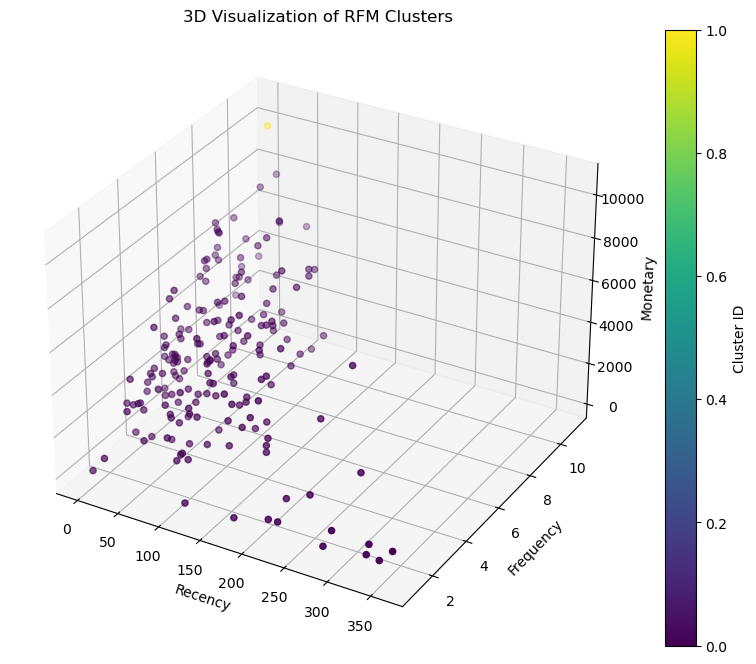

In [126]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Assuming your 'rfm_data' DataFrame has the columns 'Recency', 'Frequency', 'Monetary', and 'Cluster_Label'
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of RFM data with colors representing different clusters
scatter = ax.scatter(rfm_data['Recency'], rfm_data['Frequency'], rfm_data['Monetary'], 
                     c=rfm_data['Clusters_ID'], cmap='viridis')

# Add labels and title
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Visualization of RFM Clusters')

# Show color bar
plt.colorbar(scatter, label='Cluster ID')

plt.show()
